# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: [Matt Hanson](https://github.com/matthewellishanson)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

1. The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import json and pickle (included in the Python Standard Library).

import json
import pickle

import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')
!pip list


All prereqs installed.
Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing                 2.2.0
fastjsonschema          

In [2]:
import requests
import json

result = json.loads(requests.get('https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul').text)
print(result['lyrics'])

I'm your only friend 
I'm not your only friend 
But I'm a little glowing friend 
But really I'm not actually your friend 
But I am 


Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I have a secret to tell 

From my electrical well 

It's a simple message and I'm leaving out the whistles and bells 

So the room must listen to me 

Filibuster vigilantly 

My name is blue canary one note* spelled l-i-t-e 

My story's infinite 

Like the Longines Symphonette it doesn't rest 



Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I'm your only friend 

I'm not your only friend 

But I'm a little glowing friend 

But really I'm not actually your f

2. Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

In [3]:
# Print the lyrics of the song
print(result['lyrics'])

# %pip install spacy
# %pip install spacytextblob


# Import the libraries for use
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")
# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe("spacytextblob")
# Process the lyrics text
lyrics = result['lyrics']
doc = nlp(lyrics)
# use the SpacyTextBlob component to get sentiment
sentiment = doc._.blob.sentiment
# Print the sentiment
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

# -- Analysis of the lyrics -- 
# The lyrics of 'Birdhouse in Your Soul' by They Might Be Giants skew positive with a polarity score of 0.405 on a scale from -1 (very negative) to 1 (very positive).


I'm your only friend 
I'm not your only friend 
But I'm a little glowing friend 
But really I'm not actually your friend 
But I am 


Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I have a secret to tell 

From my electrical well 

It's a simple message and I'm leaving out the whistles and bells 

So the room must listen to me 

Filibuster vigilantly 

My name is blue canary one note* spelled l-i-t-e 

My story's infinite 

Like the Longines Symphonette it doesn't rest 



Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I'm your only friend 

I'm not your only friend 

But I'm a little glowing friend 

But really I'm not actually your f

3. Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [10]:
# Define a function to take the artist, song and filename as arguments, then write the lyrics to a file
def save_lyrics_to_file(artist, song, filename):
    # Make the API request
    response = requests.get(f'https://api.lyrics.ovh/v1/{artist}/{song}')
    
    # Check if the request was successful
    if response.status_code == 200:
        result = json.loads(response.text)
        lyrics = result['lyrics']
        
        # Write the lyrics to a file
        with open(filename, 'w', encoding='utf-8') as file:
            file.write(lyrics)
        print(f"Lyrics saved to {filename}")
    else:
        print("Error fetching lyrics:", response.status_code)
    
# Example usage of the function
# save_lyrics_to_file('They Might Be Giants', 'Birdhouse in Your Soul', 'birdhouse_lyrics.txt')
# save_lyrics_to_file('Kendrick Lamar', 'The Art of Peer Pressure', 'artofpeerpressure_lyrics.txt')
# save_lyrics_to_file('Adele', 'Hello', 'hello_lyrics.txt')
# save_lyrics_to_file('Cher', 'Believe', 'believe_lyrics.txt')
save_lyrics_to_file('Taylor Swift', 'Blank Space', 'blankspace_lyrics.txt')
save_lyrics_to_file('Taylor Swift', 'Hoax', 'hoax_lyrics.txt')
save_lyrics_to_file('The National', 'Fake Empire', 'fakeempire_lyrics.txt')

Lyrics saved to blankspace_lyrics.txt
Lyrics saved to hoax_lyrics.txt
Lyrics saved to fakeempire_lyrics.txt


4. Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

In [15]:
# Define a function to get the polarity of the lyrics from a file
def get_lyrics_polarity(filename):
    # Read the lyrics from the file
    with open(filename, 'r', encoding='utf-8') as file:
        lyrics_text = file.read()
    # Process the lyrics with the existing spaCy pipeline
    doc = nlp(lyrics_text)
    # Return the polarity score
    return doc._.blob.polarity

# Define a function to get the subjectivity of the lyrics for a given artist and song
def get_lyrics_subjectivity(filename):
    # Read the lyrics from the file
    with open(filename, 'r', encoding='utf-8') as file:
        lyrics_text = file.read()  
    # Process the lyrics with the existing spaCy pipeline
    doc = nlp(lyrics_text)
    # Return the subjectivity score
    return doc._.blob.subjectivity

# use the function to get the subjectivity of the lyrics, print the song name and the subjectivity in a formatted string
def print_lyrics_subjectivity(artist, song, filename):
    subjectivity = get_lyrics_subjectivity(filename)
    print(f"The subjectivity of '{song}' by {artist} is: {subjectivity}")

# Example usage of the function
print_lyrics_subjectivity('Kendrick Lamar', 'The Art of Peer Pressure', 'artofpeerpressure_lyrics.txt')
print_lyrics_subjectivity('Adele', 'Hello', 'hello_lyrics.txt')
print_lyrics_subjectivity('Cher', 'Believe', 'believe_lyrics.txt')
print_lyrics_subjectivity('Taylor Swift', 'Blank Space', 'blankspace_lyrics.txt')
print_lyrics_subjectivity('Taylor Swift', 'Hoax', 'hoax_lyrics.txt')
print_lyrics_subjectivity('The National', 'Fake Empire', 'fakeempire_lyrics.txt')

# use the function to get the polarity of the lyrics, print the song name and the polarity in a formatted string
def print_lyrics_polarity(artist, song, filename):
    polarity = get_lyrics_polarity(filename)
    print(f"The polarity of '{song}' by {artist} is: {polarity}")
# Example usage of the function
print_lyrics_polarity('Kendrick Lamar', 'The Art of Peer Pressure', 'artofpeerpressure_lyrics.txt')
print_lyrics_polarity('Adele', 'Hello', 'hello_lyrics.txt')
print_lyrics_polarity('Cher', 'Believe', 'believe_lyrics.txt') 
print_lyrics_polarity('Taylor Swift', 'Blank Space', 'blankspace_lyrics.txt')
print_lyrics_polarity('Taylor Swift', 'Hoax', 'hoax_lyrics.txt')
print_lyrics_polarity('The National', 'Fake Empire', 'fakeempire_lyrics.txt')
get_lyrics_polarity('artofpeerpressure_lyrics.txt')

# -- Analysis of the lyrics from files --
# The polarity of the three songs didn't totally suprise me, in the first two cases, given the darker themes of those two songs. 
# But what did somewhat suprise me was the polarity of 'Believe' by Cher, which I expected to be more positive.

The subjectivity of 'The Art of Peer Pressure' by Kendrick Lamar is: 0.5110141169103432
The subjectivity of 'Hello' by Adele is: 0.48879310344827587
The subjectivity of 'Believe' by Cher is: 0.5293749999999999
The subjectivity of 'Blank Space' by Taylor Swift is: 0.6157892356399819
The subjectivity of 'Hoax' by Taylor Swift is: 0.46140404040404037
The subjectivity of 'Fake Empire' by The National is: 0.7762820512820513
The polarity of 'The Art of Peer Pressure' by Kendrick Lamar is: -0.025675896430613413
The polarity of 'Hello' by Adele is: -0.14109195402298852
The polarity of 'Believe' by Cher is: 0.25604166666666667
The polarity of 'Blank Space' by Taylor Swift is: -0.0037358661239258115
The polarity of 'Hoax' by Taylor Swift is: 0.02456565656565657
The polarity of 'Fake Empire' by The National is: -0.21666666666666665


-0.025675896430613413

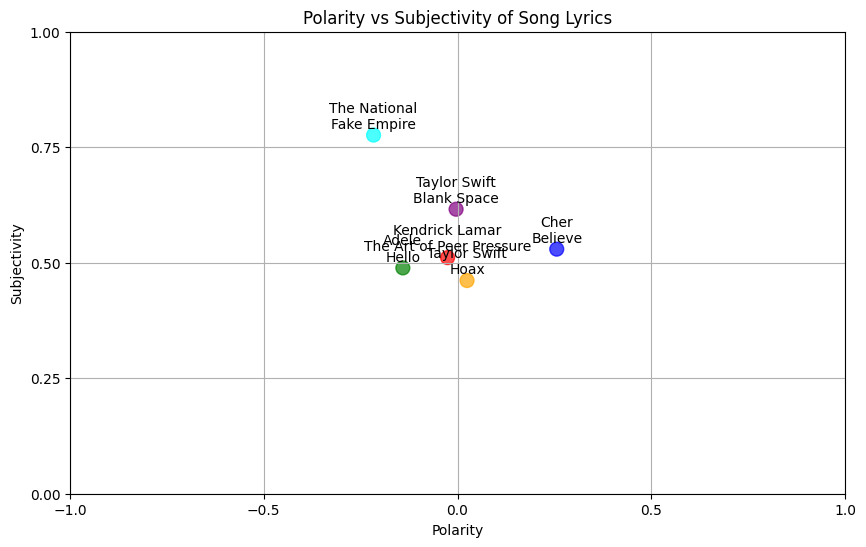

In [21]:
import matplotlib.pyplot as plt

# Song info and corresponding filenames
songs = [
    ("Kendrick Lamar", "The Art of Peer Pressure", "artofpeerpressure_lyrics.txt"),
    ("Adele", "Hello", "hello_lyrics.txt"),
    ("Cher", "Believe", "believe_lyrics.txt"),
    ("Taylor Swift", "Blank Space", "blankspace_lyrics.txt"),
    ("Taylor Swift", "Hoax", "hoax_lyrics.txt"),
    ("The National", "Fake Empire", "fakeempire_lyrics.txt"),
]

# Get polarity scores
polarities = [get_lyrics_polarity(filename) for _, _, filename in songs]
# Get subjectivity scores
subjectivities = [get_lyrics_subjectivity(filename) for _, _, filename in songs]    
labels = [f"{artist}\n{song}" for artist, song, _ in songs]

# Create scatterplot of both polarity and subjectivity
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
plt.scatter(polarities, subjectivities, color=colors[:len(songs)], s=100, alpha=0.7)
plt.title('Polarity vs Subjectivity of Song Lyrics')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid(True)
# Annotate each point with the song title
for i, label in enumerate(labels):
    plt.annotate(label, (polarities[i], subjectivities[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()


In [22]:
# save the figure as a PNG file
plt.savefig('lyrics_polarity_subjectivity.png')

<Figure size 640x480 with 0 Axes>

In [6]:
# -- Output the python notebook to html --
!jupyter nbconvert --to html requests-json-nlp.ipynb

[NbConvertApp] Converting notebook requests-json-nlp.ipynb to html
[NbConvertApp] Writing 301183 bytes to requests-json-nlp.html
